# Optimal number of FCs

Importing Required Libraries

In [17]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [18]:
zonexy=pd.read_excel("xy.xlsx",sheet_name="Sheet2")  ##Study Area Data
print(zonexy)

      sr  zone   x   y
0      1     0   0  11
1      2     3   0  10
2      3     7   0   9
3      4     6   0   8
4      5     4   0   7
5      6     0   0   6
6      7     7   0   5
7      8     4   0   4
8      9     8   0   3
9     10     3   0   2
10    11     0   0   1
11    12     0   0   0
12    13     3   1  11
13    14     5   1  10
14    15    11   1   9
15    16     1   1   8
16    17     6   1   7
17    18    13   1   6
18    19    11   1   5
19    20     9   1   4
20    21    13   1   3
21    22    12   1   2
22    23     6   1   1
23    24     5   1   0
24    25     5   2  11
25    26     4   2  10
26    27    16   2   9
27    28     7   2   8
28    29     9   2   7
29    30    14   2   6
..   ...   ...  ..  ..
150  151    12  12   5
151  152    17  12   4
152  153     9  12   3
153  154    15  12   2
154  155     4  12   1
155  156     4  12   0
156  157     4  13  11
157  158     6  13  10
158  159     5  13   9
159  160    15  13   8
160  161     9  13   7
161  162   

In [19]:
zdata=pd.read_excel("xy.xlsx",sheet_name="Sheet3")


In [20]:
busxy=pd.read_excel("bus1.xlsx")     ##Bus Data
print(busxy)

      sr  zone   x   y
0      1     7   0   9
1      2     7   0   5
2      3     8   0   3
3      4    11   1   9
4      5    13   1   6
5      6    11   1   5
6      7     9   1   4
7      8    13   1   3
8      9    12   1   2
9     10    16   2   9
10    11     7   2   8
11    12     9   2   7
12    13    14   2   6
13    14    15   2   4
14    15    14   2   3
15    16     9   2   2
16    17     7   2   1
17    18     6   3  10
18    19     9   3   9
19    20    15   3   8
20    21    10   3   7
21    22    10   3   6
22    23    16   3   5
23    24    14   3   4
24    25    19   3   3
25    26    16   3   2
26    27     8   3   1
27    28     9   4   9
28    29    16   4   8
29    30     8   4   7
..   ...   ...  ..  ..
88    89    12  10   4
89    90    11  10   3
90    91    17  10   2
91    92     7  11  10
92    93    17  11   8
93    94    11  11   7
94    95     8  11   6
95    96    19  11   5
96    97    17  11   4
97    98    13  11   3
98    99    16  11   2
99   100   

In [21]:
def xyfc(ns):                        ##Funtion to place station Equdistantly
    
    x=118//(ns+1)
    xy=[]
    nos=x
    n=0
    while(n<ns):
    
        xcor=busxy['x'][nos-1]
        ycor=busxy['y'][nos-1]
        xy.append([xcor,ycor])
        nos+=x
        n+=1
    return(xy)

In [22]:
def s(j):                            ##Function for S(j)
    z=1
    sum1=0
    while(z<=180):
        var=0
        if(zdata['st'][z-1]==j):
            var=1
        sum1+=(0.1*zonexy['zone'][z-1]*var)
        z+=1
    return sum1

In [23]:
def sdc(cha):                         ##Function to calculate SDC
    
    val=70000+(25*240*s(cha))+(208.33*(s(cha)-1)*96)
    return val

In [24]:
def evuc(z):                           ##Function to calculate EVUC
    vals=0
    j=zdata["st"][z-1]
    x1=zonexy['x'][z-1]
    x2=lis[j-1][0]
    y1=zonexy['y'][z-1]
    y2=lis[j-1][1]
    dist1=np.sqrt((x2-x1)**2 + (y2-y1)**2)
    
    vals+=(dist1)*0.142*4*0.98*zonexy['zone'][z-1]*87.7
    
    return vals
    
    

Process to find the Optimal Number of FCs

In [25]:
sdcarr=[]
xaxis=[]
for ns in range(5,16):
    zdata=pd.read_excel("xy.xlsx",sheet_name="Sheet3")
    xaxis.append(ns)

    for j in range(1,181):

        dist=100000000
        h=0
        lis=xyfc(ns)
        for i in lis:
            x1=zonexy['x'][j-1]
            x2=i[0]
            y1=zonexy['y'][j-1]
            y2=i[1]

            dist1=np.sqrt((x2-x1)**2 + (y2-y1)**2)
            if(dist1<dist):
                dist=dist1
                h=(lis.index(i))+1

        df2 = {'st': h, 'zone':j}
        zdata = zdata.append(df2, ignore_index = True)
       
    sdcval=0
    for x in range(1,ns+1):
        
        value=sdc(x)
        sdcval+=value
    evval=0
    for zon in range(1,181):
       
        evval+=evuc(zon)
        
    sdcval+=evval
    
    sdcarr.append(sdcval)
    
print(sdcarr)
print(xaxis)
#print(zdata)
        
    
    
    
    

[4758107.043948352, 4716736.866156581, 4743671.780449519, 4783093.592155193, 4853034.630667915, 4930601.911632003, 5010335.218234033, 5056115.271347978, 5035300.7746197125, 5060542.890124918, 5101908.575189765]
[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


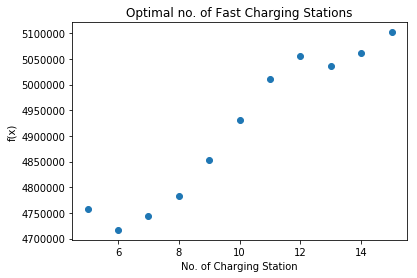

In [26]:
plt.scatter(xaxis,sdcarr)    ##Plotting of Objective Function
plt.title("Optimal no. of Fast Charging Stations")
plt.xlabel("No. of Charging Station")
plt.ylabel("f(x)")
plt.show()

In [27]:
optimal_fcs=xaxis[sdcarr.index(min(sdcarr))]         ##Min number of FCs required.
optimal_fcs


6

In [28]:
zdata=pd.read_excel("xy.xlsx",sheet_name="Sheet3")
xaxis.append(ns)

for j in range(1,181):

    dist=100000000
    h=0
    lis=xyfc(optimal_fcs)
    for i in lis:
        x1=zonexy['x'][j-1]
        x2=i[0]
        y1=zonexy['y'][j-1]
        y2=i[1]

        dist1=np.sqrt((x2-x1)**2 + (y2-y1)**2)
        if(dist1<dist):
            dist=dist1
            h=(lis.index(i))+1

    df2 = {'st': h, 'zone':j}
    zdata = zdata.append(df2, ignore_index = True)
        
zdata

,zone,st
0,1,3
1,2,3
2,3,2
3,4,2
4,5,2
5,6,2
6,7,1
7,8,1
8,9,1
9,10,1


In [29]:
print(xyfc(6))


[[2, 2], [4, 5], [6, 9], [8, 10], [9, 3], [11, 5]]


In [30]:
xy_buses=[]
x_bus=list(busxy['x'])
y_bus=list(busxy['y'])

for i in range(len(x_bus)):
    x=[x_bus[i],y_bus[i]]
    xy_buses.append(x)
xy_buses

[[0, 9],
 [0, 5],
 [0, 3],
 [1, 9],
 [1, 6],
 [1, 5],
 [1, 4],
 [1, 3],
 [1, 2],
 [2, 9],
 [2, 8],
 [2, 7],
 [2, 6],
 [2, 4],
 [2, 3],
 [2, 2],
 [2, 1],
 [3, 10],
 [3, 9],
 [3, 8],
 [3, 7],
 [3, 6],
 [3, 5],
 [3, 4],
 [3, 3],
 [3, 2],
 [3, 1],
 [4, 9],
 [4, 8],
 [4, 7],
 [4, 6],
 [4, 5],
 [4, 4],
 [4, 3],
 [4, 2],
 [4, 1],
 [5, 11],
 [5, 10],
 [5, 9],
 [5, 8],
 [5, 7],
 [5, 6],
 [5, 5],
 [5, 4],
 [5, 3],
 [5, 2],
 [6, 10],
 [6, 9],
 [6, 8],
 [6, 7],
 [6, 6],
 [6, 5],
 [6, 3],
 [6, 2],
 [7, 10],
 [7, 9],
 [7, 8],
 [7, 7],
 [7, 6],
 [7, 5],
 [7, 4],
 [7, 2],
 [7, 0],
 [8, 10],
 [8, 9],
 [8, 8],
 [8, 6],
 [8, 5],
 [8, 4],
 [8, 3],
 [8, 2],
 [8, 1],
 [9, 10],
 [9, 9],
 [9, 8],
 [9, 7],
 [9, 6],
 [9, 5],
 [9, 4],
 [9, 3],
 [9, 2],
 [10, 11],
 [10, 10],
 [10, 9],
 [10, 8],
 [10, 7],
 [10, 6],
 [10, 5],
 [10, 4],
 [10, 3],
 [10, 2],
 [11, 10],
 [11, 8],
 [11, 7],
 [11, 6],
 [11, 5],
 [11, 4],
 [11, 3],
 [11, 2],
 [12, 11],
 [12, 9],
 [12, 8],
 [12, 7],
 [12, 6],
 [12, 5],
 [12, 4],
 [12, 3],


In [35]:
ran_pop=[]
for i in range(100):
    rand=random.sample(xy_buses, optimal_fcs)
    ran_pop.append(rand)
print(ran_pop[:10])

[[[10, 4], [0, 3], [3, 1], [12, 11], [2, 8], [10, 3]], [[9, 10], [6, 2], [12, 2], [12, 9], [4, 3], [4, 9]], [[10, 4], [5, 4], [12, 6], [11, 4], [8, 4], [8, 10]], [[0, 5], [11, 7], [9, 5], [8, 5], [10, 3], [9, 3]], [[9, 2], [12, 7], [8, 6], [2, 2], [6, 7], [11, 2]], [[5, 7], [9, 7], [6, 5], [3, 1], [2, 1], [10, 9]], [[9, 8], [3, 3], [1, 5], [3, 4], [9, 7], [9, 2]], [[9, 2], [10, 11], [4, 9], [6, 8], [2, 3], [12, 5]], [[11, 2], [6, 5], [3, 3], [10, 6], [4, 5], [10, 8]], [[1, 9], [7, 8], [3, 7], [4, 2], [9, 2], [9, 4]]]


In [34]:
len(ran_pop)

100